
Multiclass Classification Example

objective: build a network to classify Reuters newswires into 46 mutually exclusive topics / only classified as one so it makes this more explicitly a single-label, multiclass classification. 

dataset: reuters dataset of short newswires and their topics published in 1986

In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
print(train_data.shape)
print(test_data.shape)

(8982,)
(2246,)


In [3]:
# vectorize the data 
import numpy as np 

# exact same vectorization method as classifying iMDB reviews in the binary classification example 
# map the words used in the newswires to a list of 10000 1s and 0s where each index corresponds to a words
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1. 
  return results 

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
# vectorize the labels
# same idea as vectorizing the input data, each of the labels is a list of 46 where the index with 1 is the answer for that observation
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1. 
  return results 

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

# Built in way in Keras 
# from keras.utils.np_utils import to_categorical
# one_hot_train_labels = to_categorical(train_labels)

In [7]:
# building our model
# we are using more hidden units (64 instead of 16) for these layers because we don't want a layer or each layer acting
# as a bottleneck that drops off important information to learn each of the 46 categories we want the model
# to classify. 
from keras import models
from keras import layers

model = models.Sequential() 
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

# two things to note about this architecture:
# 1. last layer is a dense layer of size 46. that means that for each input the output will be a 46-dimensional vector.
# 2. last layer uses a softmax activation. we used this in the MNIST example. it means the network will output
# a probobility distribution. the 46 scores will sum to 1. 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# setting aside a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# fit the model 
history = model.fit(partial_x_train,
                    partial_y_train,
                    batch_size=512,
                    epochs=20,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 4s 531us/step - loss: 2.4908 - acc: 0.4932 - val_loss: 1.6733 - val_acc: 0.6450
Epoch 2/20
7982/7982 [==============================] - 2s 304us/step - loss: 1.3833 - acc: 0.7058 - val_loss: 1.2740 - val_acc: 0.7190
Epoch 3/20
7982/7982 [==============================] - 2s 200us/step - loss: 1.0425 - acc: 0.7720 - val_loss: 1.1153 - val_acc: 0.7630
Epoch 4/20
7982/7982 [==============================] - 2s 190us/step - loss: 0.8209 - acc: 0.8292 - val_loss: 1.0200 - val_acc: 0.7740
Epoch 5/20
7982/7982 [==============================] - 2s 212us/step - loss: 0.6575 - acc: 0.8643 - val_loss: 0.9689 - val_acc: 0.7960
Epoch 6/20
7982/7982 [==============================] - 2s 212us/step - loss: 0.5239 - acc: 0.8935 - val_loss: 0.9205 - val_acc: 0.8100
Epoch 7/20
7982/7982 [==============================] - 2s 278us/step - loss: 0.4278 - acc: 0.9118 - val_loss: 0.9118 - val_acc: 0.8030


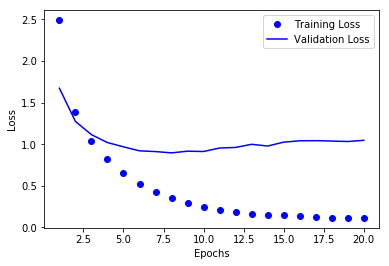

In [11]:
# visualizing results 
import matplotlib.pyplot as plt 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

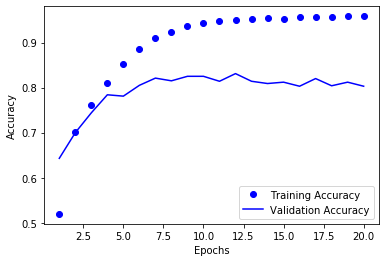

In [0]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [12]:
# network begins to overfit after 9 epochs, will do new one with 9 and evaluate it 

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)
print(results)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 304us/step - loss: 2.5359 - acc: 0.5226 - val_loss: 1.6818 - val_acc: 0.6530
Epoch 2/9
7982/7982 [==============================] - 2s 227us/step - loss: 1.3755 - acc: 0.7125 - val_loss: 1.2786 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 2s 205us/step - loss: 1.0173 - acc: 0.7793 - val_loss: 1.1347 - val_acc: 0.7500
Epoch 4/9
7982/7982 [==============================] - 2s 216us/step - loss: 0.8027 - acc: 0.8246 - val_loss: 1.0559 - val_acc: 0.7550
Epoch 5/9
7982/7982 [==============================] - 2s 298us/step - loss: 0.6445 - acc: 0.8621 - val_loss: 0.9787 - val_acc: 0.7920
Epoch 6/9
7982/7982 [==============================] - 2s 245us/step - loss: 0.5169 - acc: 0.8904 - val_loss: 0.9113 - val_acc: 0.8130
Epoch 7/9
7982/7982 [==============================] - 2s 198us/step - loss: 0.4159 - acc: 0.9137 - val_loss: 0.8950 - val_acc: 0.8220
Epoch 8

Simple mulit-classification (single label) example that gets 78% of testing observations correctly classified! 